<a href="https://colab.research.google.com/github/aoiupen/3D_Segment/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import& Setting**

In [ ]:
import os
import json
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
LABELS = ["head","body"]
COLORS = ["red","blue"]

VAL_SPLIT = 0.2
NUM_SAMPLE_POINTS = 1024
BATCH_SIZE = 32
EPOCHS = 60
INITIAL_LR = 1e-3

In [ ]:
coor_list = []
label_list = []

directory_path = '/content/drive/MyDrive/pointnet' # 디렉토리 경로
num_files = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])

for i in range(1,num_files+1):
    head_coor = ""
    body_coor = ""
    head_coor = np.loadtxt('/content/drive/MyDrive/pointnet/head_{0}.txt'.format(str(i).zfill(4)))
    body_coor = np.loadtxt('/content/drive/MyDrive/pointnet/body_{0}.txt'.format(str(i).zfill(4)))
    coor = np.concatenate((head_coor,body_coor))
    coor_list.append(coor)

    label_h = ["head"]*len(head_coor)
    label_b = ["body"]*len(body_coor)
    label = label_h + label_b
    label_data = [LABELS.index(lab) for lab in label]
    data = keras.utils.to_categorical(label_data, num_classes=len(LABELS))
    label_list.append(data)



array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
# 트레이닝


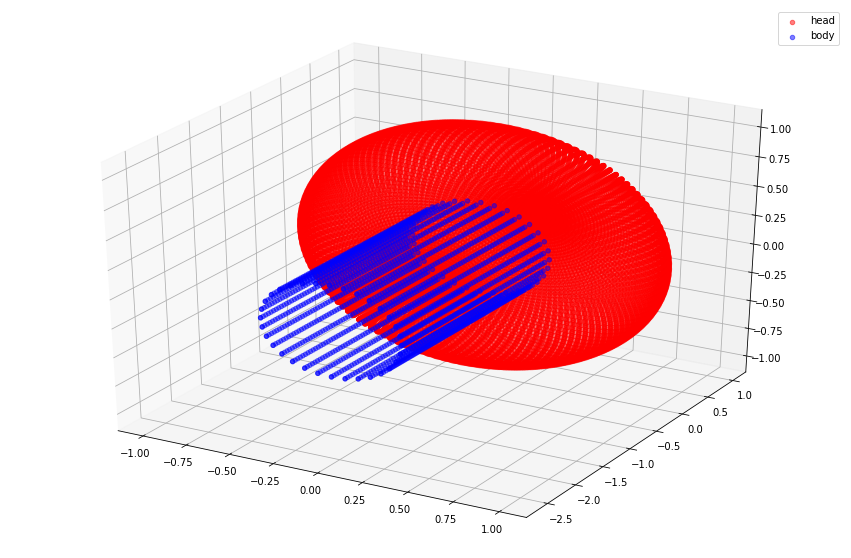

In [ ]:
def visualize_data(point_cloud, labels):
    df = pd.DataFrame(
        data={
            "x": point_cloud[:, 0],
            "y": point_cloud[:, 1],
            "z": point_cloud[:, 2],
            "label": labels,
        }
    )
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection="3d")
    for index, label in enumerate(LABELS):
        c_df = df[df["label"] == label]
        try:
            ax.scatter(
                c_df["x"], c_df["y"], c_df["z"], label=label, alpha=0.5, c=COLORS[index]
            )
        except IndexError:
            pass
    ax.legend()
    plt.show()


visualize_data(coor, label)


## **Processing**

In [ ]:
num_points = len(coor)
# Randomly sampling respective indices.
s_ix = random.sample(list(range(num_points)), NUM_SAMPLE_POINTS)
# Sampling points corresponding to sampled indices.
s_coor = np.array([coor[i] for i in s_ix])
# Sampling corresponding one-hot encoded labels.
s_data = np.array([label_data[i] for i in s_ix])
# Sampling corresponding labels for visualization.
s_label = np.array([label[i] for i in s_ix])
# Normalizing sampled point cloud.
n_coor = s_coor - np.mean(s_coor, axis=0)
n_coor /= np.max(np.linalg.norm(n_coor, axis=1))

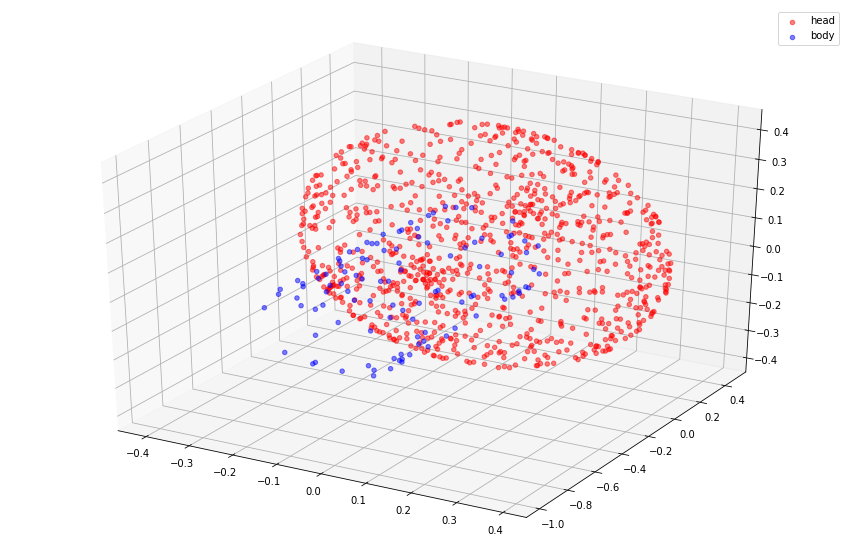

In [ ]:
visualize_data(n_coor, s_label)